Using machine learning techniques for time series forecasting, such as predicting flight delays, can be a powerful approach. Here's a general outline of steps you can take:

1. *Data Preprocessing*:
   - Explore and understand your dataset. Check for missing values, outliers, and any anomalies.
   - Convert the dataset into a suitable format for time series analysis, ensuring that you have a timestamp column and relevant features such as flight departure time, airline, airport, etc.
   - Split your dataset into training and testing sets. Since this is time series data, ensure that you're using a chronological split, typically reserving the most recent data for testing.

2. *Feature Engineering*:
   - Extract relevant features from the timestamp, such as day of week, month, hour, etc.
   - Explore lag features, which involve incorporating past values of the target variable or other relevant features. For flight delay prediction, past delays could be informative.

3. *Model Selection*:
   - Choose appropriate machine learning models for time series forecasting. Common choices include:
     - Autoregressive Integrated Moving Average (ARIMA) models
     - Seasonal ARIMA (SARIMA) models
     - Exponential Smoothing (ETS) methods
     - Prophet
     - Recurrent Neural Networks (RNNs), especially Long Short-Term Memory (LSTM) networks
     - Gradient Boosting Machines (GBMs) with time-aware features

4. *Model Training and Evaluation*:
   - Train your chosen models on the training dataset.
   - Evaluate their performance using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or others depending on the specifics of your problem.
   - Validate the models using the testing dataset.

5. *Hyperparameter Tuning and Optimization*:
   - Fine-tune hyperparameters of the selected models to improve performance. Techniques like grid search or randomized search can be employed.

6. *Model Deployment*:
   - Once satisfied with the model's performance, deploy it to make predictions on new data.

7. *Monitoring and Maintenance*:
   - Continuously monitor the model's performance and retrain/update it periodically to ensure it remains accurate as new data becomes available.

Remember, the effectiveness of your model will depend on various factors including the quality of your data, feature engineering, choice of model, and tuning of hyperparameters. Additionally, domain expertise can be valuable in understanding the intricacies of flight delays and identifying relevant features for prediction.

In [1]:
# Import the libraries we use in this project
# we will import further once needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# The data is uploaded to my local machine and I read it as CSV file
df19 = pd.read_csv('Jan_2019_ontime.csv')
df19.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [3]:
# The data is uploaded to my local machine and I read it as CSV file
df20 = pd.read_csv('Jan_2020_ontime.csv')
df20.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [4]:
# Get the column names of both DataFrames
columns_df1 = set(df19.columns)
columns_df2 = set(df20.columns)

# Find the common columns (identical columns) between the two DataFrames
identical_columns = columns_df1.intersection(columns_df2)

# Count the number of identical columns
num_identical_columns = len(identical_columns)

# Print the number of identical columns
print("Number of identical columns:", num_identical_columns)

# Get the number of columns in every DataFrames
num_columns_df19 = df19.shape[1]
num_columns_df20 = df20.shape[1]

print("Number of columns in df19:", num_columns_df19)
print("Number of columns in df20:", num_columns_df20)

Number of identical columns: 22
Number of columns in df19: 22
Number of columns in df20: 22


In [5]:
# define the number of rows and columns
df19.shape

(583985, 22)

In [6]:
df20.shape

(607346, 22)

## I want to merge the 2 dataframes

In [7]:
# Concatenate the two DataFrames along the rows axis
dfa = pd.concat([df19, df20])

# Reset index of the merged DataFrame
dfa.reset_index(drop=True, inplace=True)

dfa.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [8]:
# identify the duplicates
dfa.duplicated().sum()

0

## Drop unrelevant columns

In [9]:
dfa.drop(columns=['OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM','OP_CARRIER_FL_NUM'
                  ,'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID', "DEST_AIRPORT_ID", 'Unnamed: 21'], inplace=True)

In [10]:
dfa.shape

(1191331, 12)

In [11]:
print(dfa.columns)

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')


In [12]:
dfa.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


**--OP_UNIQUE_CARRIER:** Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). <br>
**--OP_CARRIER_AIRLINE_ID:** An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.<br>
**--OP_CARRIER:** Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique.<br>
**--TAIL_NUM:** Tail Number<br>
**--DEP_DEL15:** Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)<br>
**--ARR_DEL15:** Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)<br>
**--DIVERTED:** Diverted Flight Indicator (1=Yes, 0=No) occurs when an aircraft is redirected from its intended destination airport to an alternate airport. <br>

## Handling Missing Items

In [13]:
# Identify the null values
dfa.isnull().sum()

DAY_OF_MONTH        0
DAY_OF_WEEK         0
ORIGIN              0
DEST                0
DEP_TIME        23016
DEP_DEL15       23054
DEP_TIME_BLK        0
ARR_TIME        24136
ARR_DEL15       26100
CANCELLED           0
DIVERTED            0
DISTANCE            0
dtype: int64

In [14]:
#Dataframe summary
pd.DataFrame({'unicos':dfa.nunique(),
              'missing': dfa.isna().sum()/dfa.count(),
              'tipo':dfa.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.000000,int64
DAY_OF_WEEK,7,0.000000,int64
ORIGIN,353,0.000000,object
DEST,353,0.000000,object
DEP_TIME,1440,0.019700,float64
DEP_DEL15,2,0.019733,float64
DEP_TIME_BLK,19,0.000000,object
ARR_TIME,1440,0.020679,float64
ARR_DEL15,2,0.022399,float64
CANCELLED,2,0.000000,float64


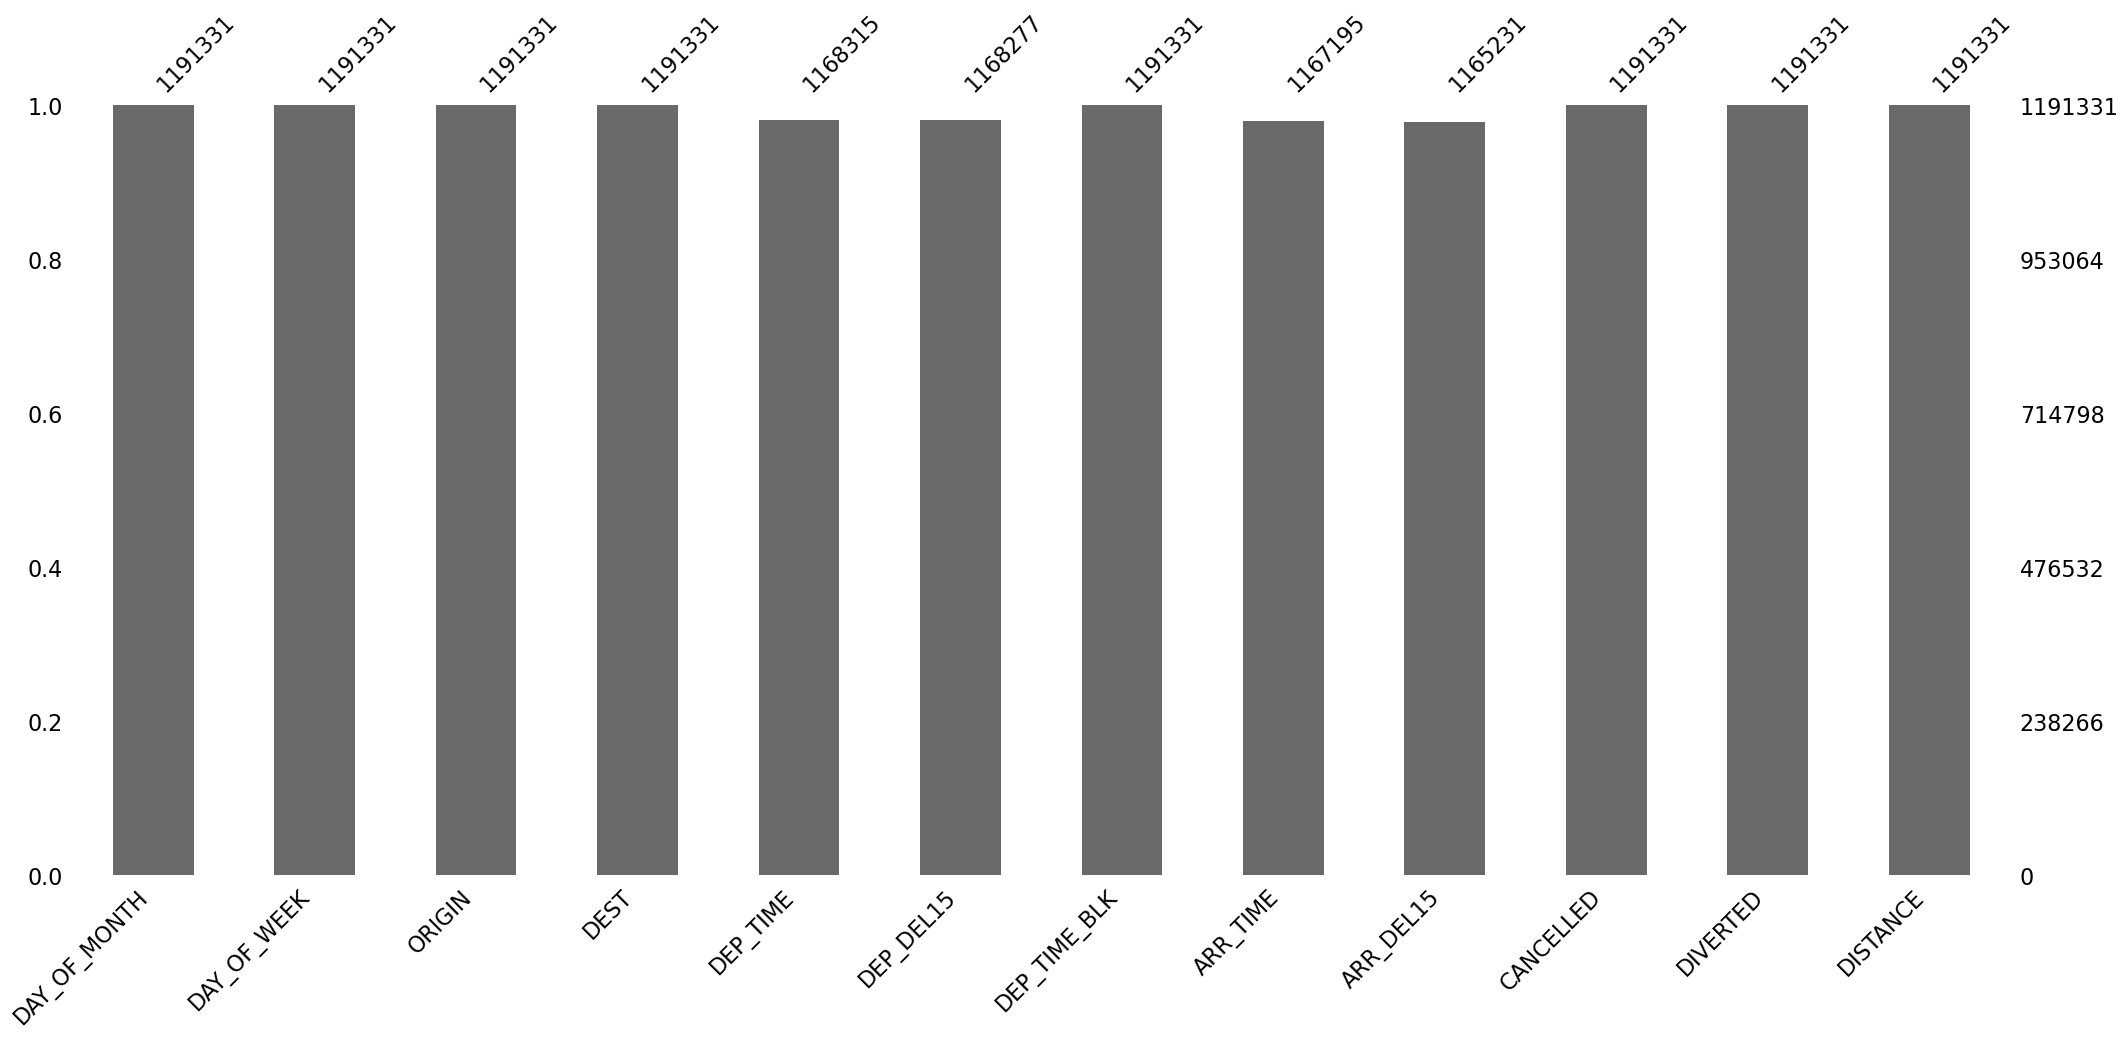

In [16]:
plt.figure(figsize=(5,5))
msno.bar(dfa)
plt.show()

In [17]:
dfa.isnull().sum()

DAY_OF_MONTH        0
DAY_OF_WEEK         0
ORIGIN              0
DEST                0
DEP_TIME        23016
DEP_DEL15       23054
DEP_TIME_BLK        0
ARR_TIME        24136
ARR_DEL15       26100
CANCELLED           0
DIVERTED            0
DISTANCE            0
dtype: int64

## The missing values found in the most crucial columns for our analysis could greatly impact the accuracy and reliability of our model if handled inappropriately.<br>
**Therefore, to maintain the integrity of our analysis and ensure robustness in our model's predictions, I have opted to remove all instances containing missing values from these columns.**

In [18]:
columns_with_missing = ['ARR_TIME', 'ARR_DEL15', 'DEP_TIME', 'DEP_DEL15']

# Create a boolean mask indicating missing values for the specified columns
missing_mask = dfa[columns_with_missing].isna().all(axis=1)

# Count the number of rows where all specified columns have missing values
num_rows_with_all_missing = missing_mask.sum()

print("Number of rows with missing values in all specified columns:", num_rows_with_all_missing)

Number of rows with missing values in all specified columns: 23016


In [19]:
# Drop rows with null values in the specified columns
dfa.dropna(subset=columns_with_missing, inplace=True)

In [20]:
dfa.isnull().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_DEL15       0
DEP_TIME_BLK    0
ARR_TIME        0
ARR_DEL15       0
CANCELLED       0
DIVERTED        0
DISTANCE        0
dtype: int64

## Data Manipulation

Distribution of Delays: Plot histograms or density plots to visualize the distribution of departure and arrival delays. This can help identify common delay patterns.

Delay Frequency by Hour/Day: Analyze the frequency of delays by hour of departure, day of the week, or month. This can help identify peak delay periods.

Correlation Analysis: Check if there's any correlation between departure delays and arrival delays.

Categorical Analysis: Explore delay patterns based on categorical variables such as origin airport, destination airport, airline carrier, etc.

Visualization: Create visualizations such as bar plots, box plots, and heatmaps to visualize delay patterns and trends.

In [21]:
dfa.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


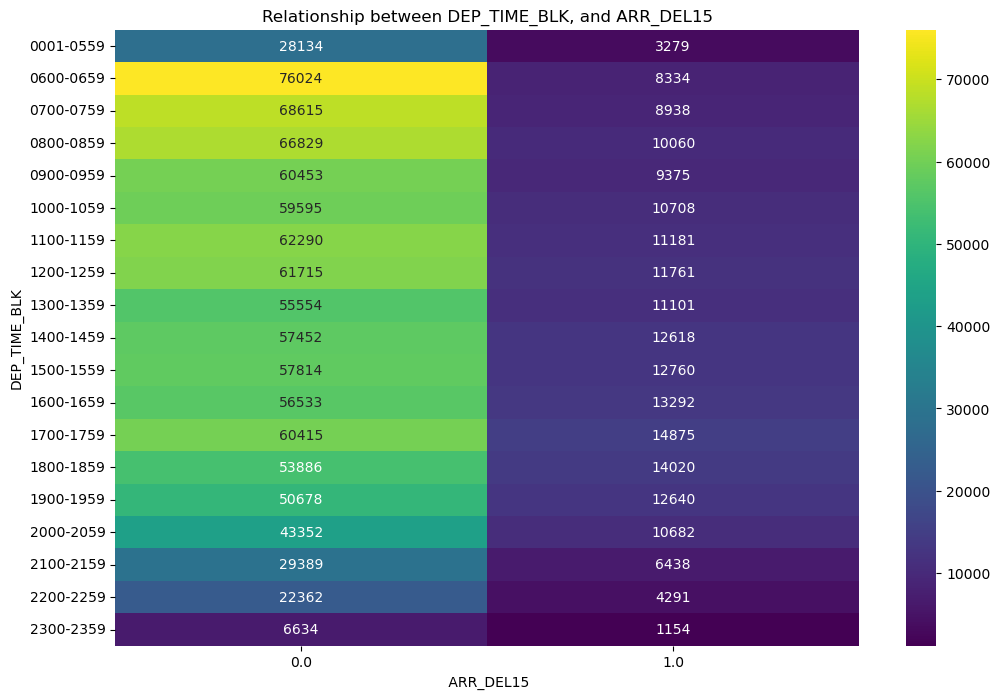

In [22]:
# Create a crosstab to count occurrences of ARR_DEL15 combinations for each DEP_TIME_BLK
dep_del15_arr_del15_crosstab = pd.crosstab(index=dfa['DEP_TIME_BLK'], columns=[dfa['ARR_DEL15']])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dep_del15_arr_del15_crosstab, cmap='viridis', annot=True, fmt='d')
plt.title('Relationship between DEP_TIME_BLK, and ARR_DEL15')
plt.xlabel(' ARR_DEL15')
plt.ylabel('DEP_TIME_BLK')
plt.show()

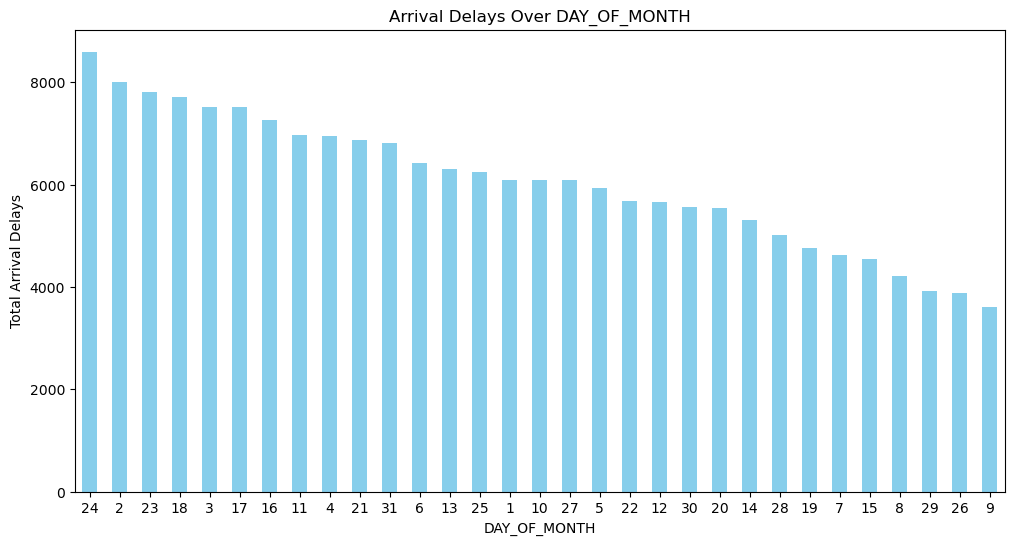

In [23]:
# Group by 'DAY_OF_MONTH' and calculate the sum of arrival delays
arrival_delays_over_day = dfa.groupby('DAY_OF_MONTH')['ARR_DEL15'].sum()

# Sort the aggregated data in descending order
arrival_delays_over_day_sorted = arrival_delays_over_day.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
arrival_delays_over_day_sorted.plot(kind='bar', color='skyblue')
plt.title('Arrival Delays Over DAY_OF_MONTH')
plt.xlabel('DAY_OF_MONTH')
plt.ylabel('Total Arrival Delays')
plt.xticks(rotation=0)
plt.show()

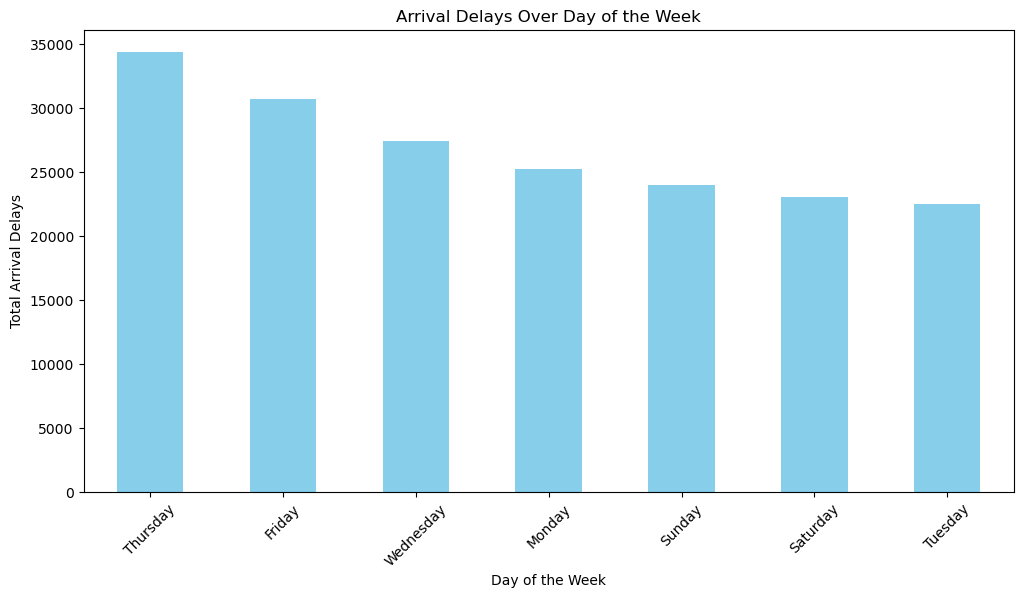

In [24]:
# Define a dictionary to map encoded numbers to day names
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# Map encoded numbers to day names in the DataFrame
dfa['DAY_NAME'] = dfa['DAY_OF_WEEK'].map(day_map)

# Group by 'DAY_NAME' and calculate the sum of arrival delays
arrival_delays_over_day = dfa.groupby('DAY_NAME')['ARR_DEL15'].sum()

# Sort the aggregated data by the day of the week
arrival_delays_over_day_sorted = arrival_delays_over_day.reindex(day_map.values())

arrival_delays_over_day_sorted = arrival_delays_over_day.reindex(day_map.values()).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
arrival_delays_over_day_sorted.plot(kind='bar', color='skyblue')
plt.title('Arrival Delays Over Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Arrival Delays')
plt.xticks(rotation=45)
plt.show()

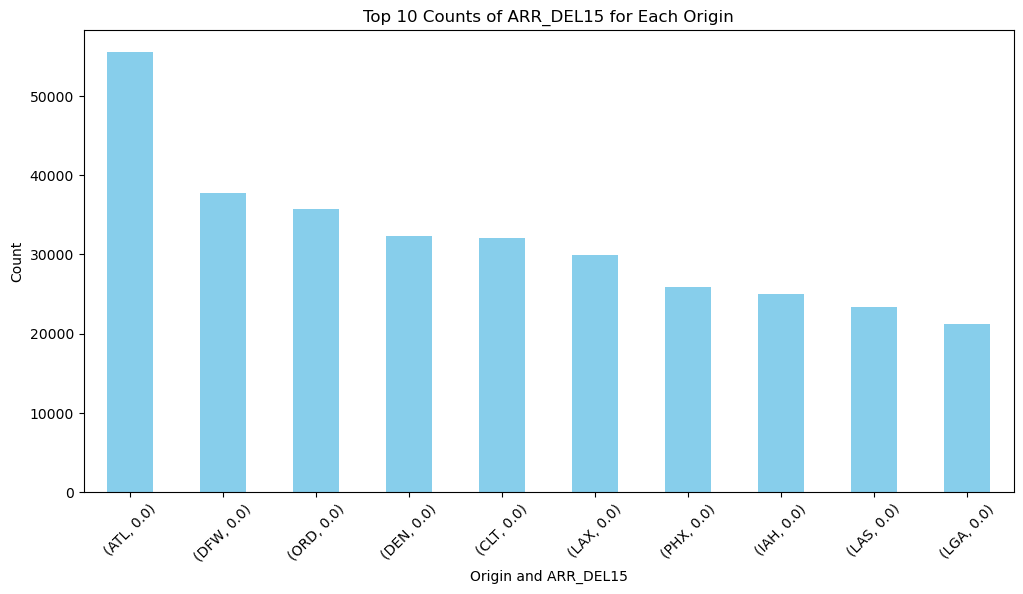

In [25]:
# Group by 'ORIGIN' and count the occurrences of 'ARR_DEL15' for each origin
top_10_origin_arr_del15_counts = dfa.groupby('ORIGIN')['ARR_DEL15'].value_counts().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
top_10_origin_arr_del15_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Counts of ARR_DEL15 for Each Origin')
plt.xlabel('Origin and ARR_DEL15')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Group by 'DEST' and calculate the counts of 'DEP_DEL15' and 'ARR_DEL15'
top_10_dest_counts = dfa.groupby('DEST')[['DEP_DEL15', 'ARR_DEL15']].sum().nlargest(10, 'DEP_DEL15')

# Display the top 10 destinations along with their counts of 'DEP_DEL15' and 'ARR_DEL15'
print(top_10_dest_counts)

      DEP_DEL15  ARR_DEL15
DEST                      
ORD      9035.0    10170.0
DFW      7274.0     8667.0
ATL      7051.0     7263.0
LGA      6315.0     7077.0
SFO      5948.0     6114.0
DEN      5442.0     5267.0
EWR      5426.0     5711.0
CLT      5340.0     5676.0
LAX      5235.0     5452.0
PHX      4059.0     3795.0


In [27]:
dfm = dfa.copy()
dfm.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DAY_NAME
0,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,Tuesday
1,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,Tuesday
2,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,Tuesday
3,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,Tuesday
4,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,Tuesday


In [28]:
dfm['ARR_TIME'].dtype

dtype('float64')

In [29]:
dfm['ARR_TIME'] = dfm['ARR_TIME'].astype(int)
dfm['DEP_TIME'] = dfm['DEP_TIME'].astype(int)

In [30]:
def split_time_columns(df, column_names):
    for column_name in column_names:
        # Convert values to string and fill missing values with '0000'
        df[column_name] = df[column_name].astype(str).fillna('0000')

        # Split the values into hours and minutes
        hours = df[column_name].apply(lambda x: int(x[:-2]) if x[:-2] else 0)   # Extract remaining characters as hours
        minutes = df[column_name].apply(lambda x: int(x[-2:]) if x[-2:] else 0)  # Extract last two characters as minutes

        # Create new columns for minutes and hours
        df[f'{column_name}_Hours'] = hours
        df[f'{column_name}_Minutes'] = minutes
        
    return df

In [31]:
columns_to_split = ['ARR_TIME', 'DEP_TIME']
dfm = split_time_columns(dfm, columns_to_split)
dfm.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DAY_NAME,ARR_TIME_Hours,ARR_TIME_Minutes,DEP_TIME_Hours,DEP_TIME_Minutes
0,1,2,GNV,ATL,601,0.0,0600-0659,722,0.0,0.0,0.0,300.0,Tuesday,7,22,6,1
1,1,2,MSP,CVG,1359,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,Tuesday,16,33,13,59
2,1,2,DTW,CVG,1215,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,Tuesday,13,29,12,15
3,1,2,TLH,ATL,1521,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,Tuesday,16,25,15,21
4,1,2,ATL,FSM,1847,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,Tuesday,19,40,18,47


### encode Categorical Data

### Label Encoding:<br>
Label Encoding is a simple technique where each unique category in a categorical feature is assigned an integer value.
It's suitable for ordinal categorical variables (categories with an inherent order), but it might not be ideal for nominal variables (categories without an inherent order) because it introduces ordinality that might not exist.
Label Encoding is typically applied when there's some ordinality in the categories, such as low, medium, high.<br>

### One-Hot Encoding:<br>
One-Hot Encoding creates binary columns for each category, where each column corresponds to one unique category and has a value of 1 if the category is present for that observation and 0 otherwise.
It's suitable for nominal categorical variables without inherent order.
One-Hot Encoding avoids introducing ordinality and can be used when categories are not ordinal.<br>

### Ordinal Encoding:<br>
Ordinal Encoding assigns a unique integer value to each category, similar to Label Encoding, but it also considers the ordinal relationship between categories.
It's suitable for ordinal categorical variables where the order of categories matters.
Ordinal Encoding preserves the ordinal relationship between categories, which can be important for certain algorithms.<br>

### Target Encoding / Mean Encoding:<br>
Target Encoding uses the target variable to encode categorical features. It replaces each category with the mean of the target variable for that category.
It's suitable for nominal or ordinal categorical variables and can capture relationships between the categorical feature and the target variable.
Target Encoding can be useful for improving predictive performance, but it may lead to overfitting if not properly regularized.<br>

### Frequency Encoding:<br>
Frequency Encoding replaces each category with the frequency (or count) of that category in the dataset.
It's suitable for nominal categorical variables and can capture the distribution of categories in the dataset.
Frequency Encoding can be useful when the frequency of categories is informative for the prediction task.


In [32]:
dfm.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DAY_NAME,ARR_TIME_Hours,ARR_TIME_Minutes,DEP_TIME_Hours,DEP_TIME_Minutes
0,1,2,GNV,ATL,601,0.0,0600-0659,722,0.0,0.0,0.0,300.0,Tuesday,7,22,6,1
1,1,2,MSP,CVG,1359,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,Tuesday,16,33,13,59
2,1,2,DTW,CVG,1215,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,Tuesday,13,29,12,15
3,1,2,TLH,ATL,1521,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,Tuesday,16,25,15,21
4,1,2,ATL,FSM,1847,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,Tuesday,19,40,18,47


In [33]:
# We use LabelEncoder to encode the categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = dfm.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns
label_encoder = LabelEncoder()
for column in ['DAY_NAME']:
    dfm[column] = label_encoder.fit_transform(dfm[column])

In [34]:
# One-Hot encoding
categorical_columns = dfm.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
dfm = pd.get_dummies(dfm, columns=['ORIGIN', 'DEST', 'DEP_TIME_BLK'])

In [35]:
dfm.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DAY_NAME,...,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359
0,1,2,601,0.0,722,0.0,0.0,0.0,300.0,5,...,False,False,False,False,False,False,False,False,False,False
1,1,2,1359,0.0,1633,0.0,0.0,0.0,596.0,5,...,True,False,False,False,False,False,False,False,False,False
2,1,2,1215,0.0,1329,0.0,0.0,0.0,229.0,5,...,False,False,False,False,False,False,False,False,False,False
3,1,2,1521,0.0,1625,0.0,0.0,0.0,223.0,5,...,False,True,False,False,False,False,False,False,False,False
4,1,2,1847,0.0,1940,0.0,0.0,0.0,579.0,5,...,False,False,False,False,False,True,False,False,False,False


In [36]:
dfa.dtypes

DAY_OF_MONTH      int64
DAY_OF_WEEK       int64
ORIGIN           object
DEST             object
DEP_TIME        float64
DEP_DEL15       float64
DEP_TIME_BLK     object
ARR_TIME        float64
ARR_DEL15       float64
CANCELLED       float64
DIVERTED        float64
DISTANCE        float64
DAY_NAME         object
dtype: object

## Let's START ML MODELS

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = dfm.drop(columns=['ARR_DEL15'])  # Features
y = dfm['ARR_DEL15']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\C.A\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9232257870729939
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95    195545
         1.0       0.77      0.74      0.76     37502

    accuracy                           0.92    233047
   macro avg       0.86      0.85      0.85    233047
weighted avg       0.92      0.92      0.92    233047



C:\Users\C.A\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


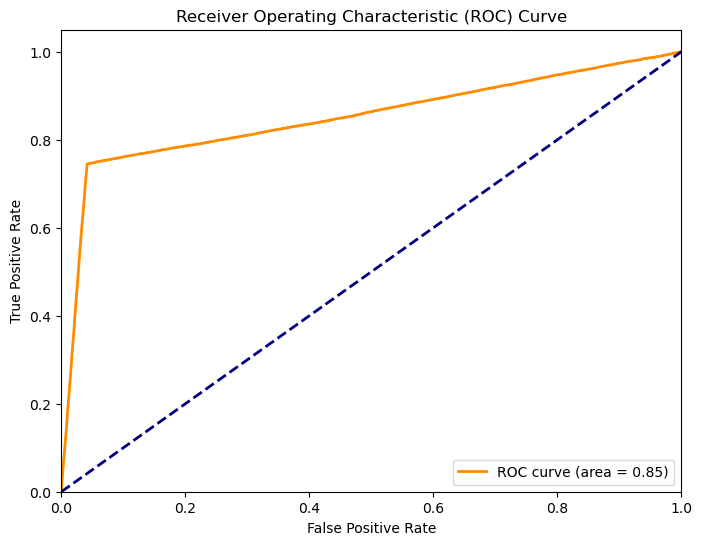

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable
X = dfm.drop(columns=['ARR_DEL15'])  # Features
y = dfm['ARR_DEL15']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = dfm.drop(columns=['ARR_DEL15'])  # Features
y = dfm['ARR_DEL15']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9318849845739271
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    195545
         1.0       0.83      0.72      0.77     37502

    accuracy                           0.93    233047
   macro avg       0.89      0.85      0.87    233047
weighted avg       0.93      0.93      0.93    233047



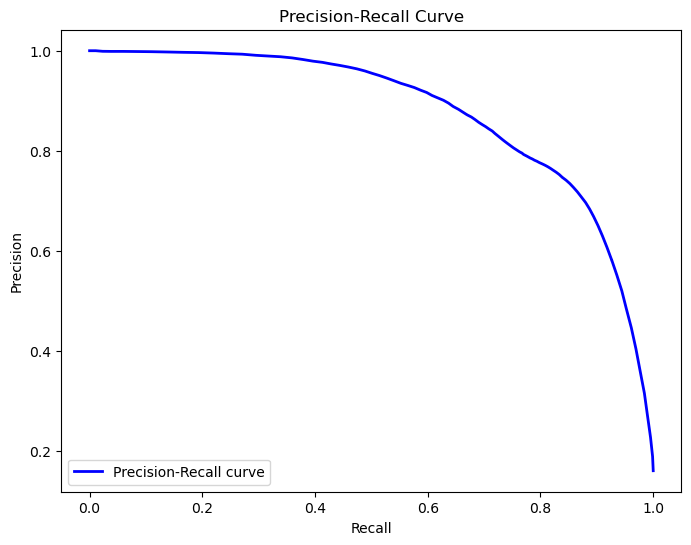

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

SVM Model<br>
K-nearest<br>
classsification reprt<br>
Roc curve<br>
precision_recall_curve<br>
no of iteration o logistic regression<br>
Dimentionality reduction<br>
evaluation matrics<br>
edit encoding (DEP_TIME_BLK) and apply new technoques of encoding <br>
feature engineering<br>